In [18]:
from config import *

# 0. Data

In [19]:
df = pd.read_csv('data/italian_stock_data_2004_2024.csv', index_col=0, header=[0,1])
df = df[[('Adj Close',ticker) for ticker in tickers]]
df.columns=[ticker.replace('.MI','').replace('1','') for ticker in tickers]
df.index = pd.to_datetime(df.index)

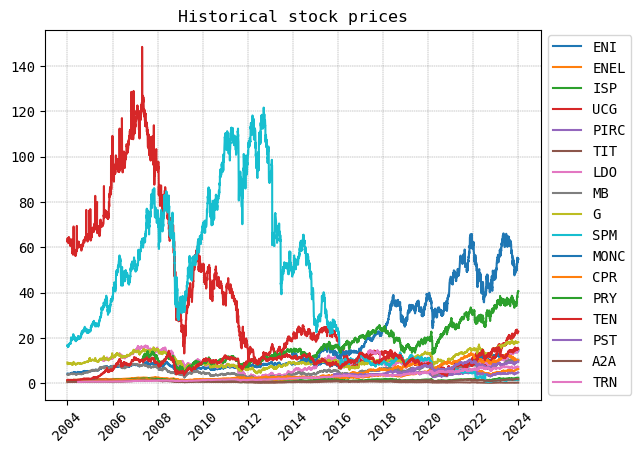

In [20]:
for col in df.columns:
    plt.plot(df.index,df[col], label=col, zorder=3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True,zorder=0)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))  # Every 2 years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.title('Historical stock prices')
plt.show()

In [21]:
for col in df.columns:
    df[col] = df[col].pct_change() # Create a dataset of returns
df

,ENI,ENEL,ISP,UCG,PIRC,TIT,LDO,MB,G,SPM,MONC,CPR,PRY,TEN,PST,A2A,TRN
Date,,,,,,,,,,,,,,,,,
2004-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-02 00:00:00+00:00,0.029412,0.012987,-0.037284,0.018692,NaN,0.036170,NaN,-0.040975,-0.077922,0.024961,NaN,0.005195,NaN,0.001901,NaN,0.027816,NaN
2004-01-05 00:00:00+00:00,0.004546,0.016484,-0.015974,0.004587,NaN,0.010267,NaN,0.004619,0.008451,-0.009133,NaN,0.007752,NaN,0.049336,NaN,-0.013201,NaN
2004-01-06 00:00:00+00:00,-0.004525,0.009009,0.003246,0.000000,NaN,0.026423,NaN,0.002299,0.000466,0.003072,NaN,-0.001282,NaN,0.070524,NaN,0.005351,NaN
2004-01-07 00:00:00+00:00,-0.030519,-0.008928,-0.067961,-0.022831,NaN,0.000000,NaN,-0.002294,0.000000,-0.021439,NaN,-0.003851,NaN,-0.043919,NaN,-0.021956,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-21 00:00:00+00:00,-0.000263,0.000900,-0.002655,-0.000205,-0.000206,0.016554,0.004446,-0.005803,-0.005472,-0.002762,0.009329,-0.005857,0.002217,-0.006841,-0.004380,-0.010101,0.005287
2023-12-22 00:00:00+00:00,0.005790,0.006743,0.006464,0.003287,0.002063,-0.002659,0.004426,0.009879,0.003930,0.001385,-0.004621,0.002455,0.005407,0.004696,0.003421,-0.001611,0.000000
2023-12-27 00:00:00+00:00,0.009681,0.000298,0.003589,0.001229,0.002059,0.001999,0.008475,-0.002668,0.004436,0.028344,-0.000714,0.004897,0.008067,0.000000,0.003410,-0.004841,-0.005785


In [22]:
num_stocks = len(df.columns)
avg_returns = np.array([np.mean(df[col]) for col in df.columns]).reshape(num_stocks,1)
cov_matrix = np.matrix(df.cov())

# 1. Optimization

In [ ]:
risk_aversion = 0.5

## Markowitz optimization

No closed form solution as we want weights to be non-negative for visualization purposes.

In [24]:
optimal_weights_markowitz, optimal_fitness_markowitz = markowitz_solution(num_stocks,
                                                                          avg_returns,
                                                                          cov_matrix,
                                                                          risk_aversion)

Testing closed form Markowitz solution (short selling allowed) - I checked that it is the same as scipy

In [25]:
optimal_weights_markowitz_short_selling, optimal_fitness_markowitz_short_selling = markowitz_solution(num_stocks,
                                                                                                    avg_returns,
                                                                                                    cov_matrix,
                                                                                                    risk_aversion,
                                                                                                    short_selling=True)

## Particle swarm optimization

Inertia weight (w): Influences how much of the particle’s previous velocity is retained, controlling the balance between exploration (higher w) and exploitation (lower w).

Cognitive coefficient (c1): Governs the particle’s tendency to move towards its own best-known position, promoting individual exploration.

Social coefficient (c2): Determines the particle’s tendency to move towards the global best position, promoting convergence towards a common solution.

In [26]:
def pso(avg_returns,
        cov_matrix,
        risk_aversion,
        num_particles=300, 
        num_iterations=1000, 
        w = 0.8,
        c1 = 0.1,
        c2 = 0.1,
        short_selling=False, 
        reinit_threshold=3, 
        mutation_std=0.05):

    # Initialize random positions for each particle
    if short_selling:
        particles_pos = np.random.uniform(-10, 10, size=(num_particles, num_stocks))
        #particles_pos = np.ones((num_particles, num_stocks))
    else:
        particles_pos = np.random.rand(num_particles, num_stocks)
        #particles_pos = np.ones((num_particles, num_stocks))
    particles_pos /= particles_pos.sum(axis=1, keepdims=True)

    # Initialize velocities to 0
    velocities = np.zeros((num_particles, num_stocks))

    # Prepare lists to store gbests and corresponding utilities
    gbests = []
    gbests_utilities = []

    # Initialize pbest and gbest
    pbest = copy.deepcopy(particles_pos) # the first position is necessarily the best ever explored
    fitnesses = np.apply_along_axis(fitness_function, axis=1, arr=particles_pos, avg_returns=avg_returns, cov_matrix=cov_matrix, risk_aversion=risk_aversion)*-1 # maximization
    gbest = particles_pos[np.argmax(fitnesses)]
    gbest_utility = np.max(fitnesses)

    # Initialize tracking for particle stagnation
    improvement_counts = np.zeros(num_particles)

    gbests.append(copy.deepcopy(gbest))
    gbests_utilities.append(copy.deepcopy(gbest_utility))

    # Iterate
    for _ in range(1,num_iterations+1):
        
        for i in range(num_particles):
        
            # Move each particle in the space
            r1 = np.random.rand()
            r2 = np.random.rand()
            velocities[i] = w*velocities[i] + c1*r1*(pbest[i]-particles_pos[i]) + c2*r2*(gbest-particles_pos[i])

            particles_pos[i] += velocities[i]

            # Ensure each particle's position sums to 1 (and no negativity in case of no short selling allowed)
            if not short_selling:
                particles_pos[i] = np.where(particles_pos[i]<0,0,particles_pos[i])  # Ensure no negative values
            particles_pos[i] /= particles_pos[i].sum()  # Normalize

            # Compute fitnesses in the new positions
            new_fitness = fitness_function(particles_pos[i], avg_returns=avg_returns, cov_matrix=cov_matrix, risk_aversion=risk_aversion)*-1
            pbest_fitness = fitness_function(pbest[i], avg_returns=avg_returns, cov_matrix=cov_matrix, risk_aversion=risk_aversion)*-1

            # Tweak 1: Reinitialize stagnant particles
            if new_fitness > pbest_fitness:  # Improvement occurred
                improvement_counts[i] = 0  # Reset stagnation counter
            else:
                improvement_counts[i] += 1  # Increment stagnation count

            if improvement_counts[i] >= reinit_threshold:
                if short_selling:
                    particles_pos[i] = np.random.uniform(-10, 10, size=(num_stocks))
                else:
                    particles_pos[i] = np.random.rand(num_stocks)
                particles_pos[i] /= particles_pos[i].sum()  # Ensure weights sum to 1
                improvement_counts[i] = 0

            # Update pbest where new positions have better fitness
            if new_fitness > pbest_fitness:
                pbest[i] = particles_pos[i]

            # Update gbest if there are improvements
            if new_fitness > gbest_utility:
                gbest = copy.deepcopy(particles_pos[i])
                gbest_utility = new_fitness

        # Tweak 2: Randomized local search around gbest
        gbest_perturb = gbest + np.random.normal(0, mutation_std, size=gbest.shape)
        if not short_selling:
            gbest_perturb = np.where(gbest_perturb<0,0,gbest_perturb)  # Ensure no negative values
        gbest_perturb /= gbest_perturb.sum() # Ensure it sums to 1
        perturbed_fitness = fitness_function(gbest_perturb, avg_returns=avg_returns, cov_matrix=cov_matrix, risk_aversion=risk_aversion) * -1

        if perturbed_fitness > gbest_utility:  # If perturbed version is better
            gbest = gbest_perturb
            gbest_utility = perturbed_fitness

        # Store gbest
        gbests.append(copy.deepcopy(gbest))
        gbests_utilities.append(copy.deepcopy(gbest_utility))

    return gbests, gbests_utilities, particles_pos

In [27]:
gbests, gbests_utilities, final_positions = pso(avg_returns=avg_returns, cov_matrix=cov_matrix, risk_aversion=risk_aversion)
gbests_short_selling, gbests_utilities_short_selling, final_positions_short_selling = pso(avg_returns=avg_returns, cov_matrix=cov_matrix, risk_aversion=risk_aversion, short_selling=True)

# 2. Plots

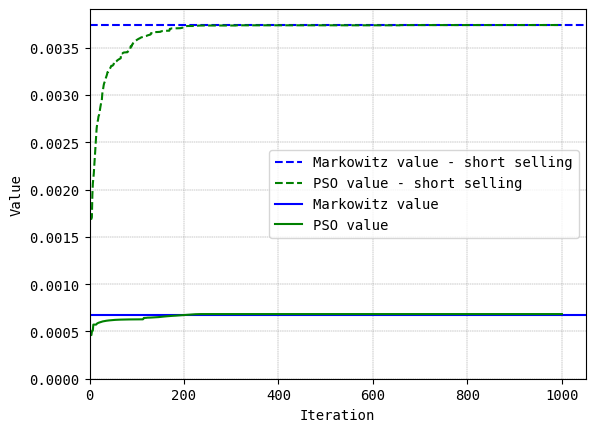

In [28]:
plt.axhline(optimal_fitness_markowitz_short_selling, label='Markowitz value - short selling', color='blue', linestyle='dashed')
plt.plot(gbests_utilities_short_selling, label='PSO value - short selling', color='green', linestyle='dashed')
plt.axhline(optimal_fitness_markowitz, label='Markowitz value', color='blue')
plt.plot(gbests_utilities, label='PSO value', color='green')
plt.xlabel('Iteration')
plt.ylabel('Value', rotation=90)
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.legend()
plt.savefig('out/PSO/Utilities.png')
plt.show()

In [29]:
def plot_solutions(gbests,
                   optimal_weights_markowitz,
                   savefig,
                   short_selling=False):
    fig = plt.figure(figsize=(12,6))
    gs = GridSpec(1, 2, width_ratios=[10, 2], figure=fig)

    # PSO
    axes0 = fig.add_subplot(gs[0])
    data = np.array(gbests)*100
    num_bars = data.shape[0]

    if short_selling:
        data_pos = np.where(data<0,0,data)
        data_neg = np.where(data>=0,0,data)
        for i,(ticker,color) in enumerate(companies_colors.items()):
            if i == 0:
                bottom_neg = np.zeros(num_bars)
                bottom_pos = np.zeros(num_bars)
            else:
                bottom_pos = data_pos[:, :i].sum(axis=1)
                bottom_neg = data_neg[:, :i].sum(axis=1)
            axes0.bar(range(num_bars), data_pos[:, i], bottom=bottom_pos, label=ticker, color=color)
            axes0.bar(range(num_bars), data_neg[:, i], bottom=bottom_neg, label=ticker, color=color)
    else:
        for i,(ticker,color) in enumerate(companies_colors.items()):
            if i == 0:
                bottom = np.zeros(num_bars)
            else:
                bottom = data[:, :i].sum(axis=1)
            axes0.bar(range(num_bars), data[:, i], bottom=bottom, label=ticker, color=color)

    #axes0.set_xticklabels([0,int(num_iterations*0.2),int(num_iterations*0.4),int(num_iterations*0.6),int(num_iterations*0.8),int(num_iterations)])
    axes0.set_xlabel('Iteration')
    axes0.set_ylabel('%')
    if short_selling:
        axes0.set_title('PSO solution - short selling')
    else:
        axes0.set_title('PSO solution - no short selling')

    # Markowitz
    axes1 = fig.add_subplot(gs[1], sharey=axes0)
    markowitz_data = optimal_weights_markowitz*100
    if short_selling:
        bottom_pos = 0
        bottom_neg = 0
        for i, (ticker, color) in enumerate(companies_colors.items()):
            if markowitz_data[i] >= 0:
                axes1.bar(0, markowitz_data[i], bottom=bottom_pos, label=ticker, color=color)
                bottom_pos += markowitz_data[i]
            else:
                axes1.bar(0, markowitz_data[i], bottom=bottom_neg, label=ticker, color=color)
                bottom_neg += markowitz_data[i]
    else:
        bottom = 0
        for i, (ticker, color) in enumerate(companies_colors.items()):
            axes1.bar(0, markowitz_data[i], bottom=bottom, label=ticker, color=color)
            bottom += markowitz_data[i]

    axes1.set_xlim(-0.5, 0.5)  # Adjust x-axis limits to center the single bar
    axes1.set_xticks([])        # Hide x-axis ticks for clarity
    axes1.set_title('Markowitz solution')
    axes1.legend(loc='center left', bbox_to_anchor=(1, 0.5), reverse=True)

    plt.tight_layout()
    plt.savefig(savefig)
    plt.show()

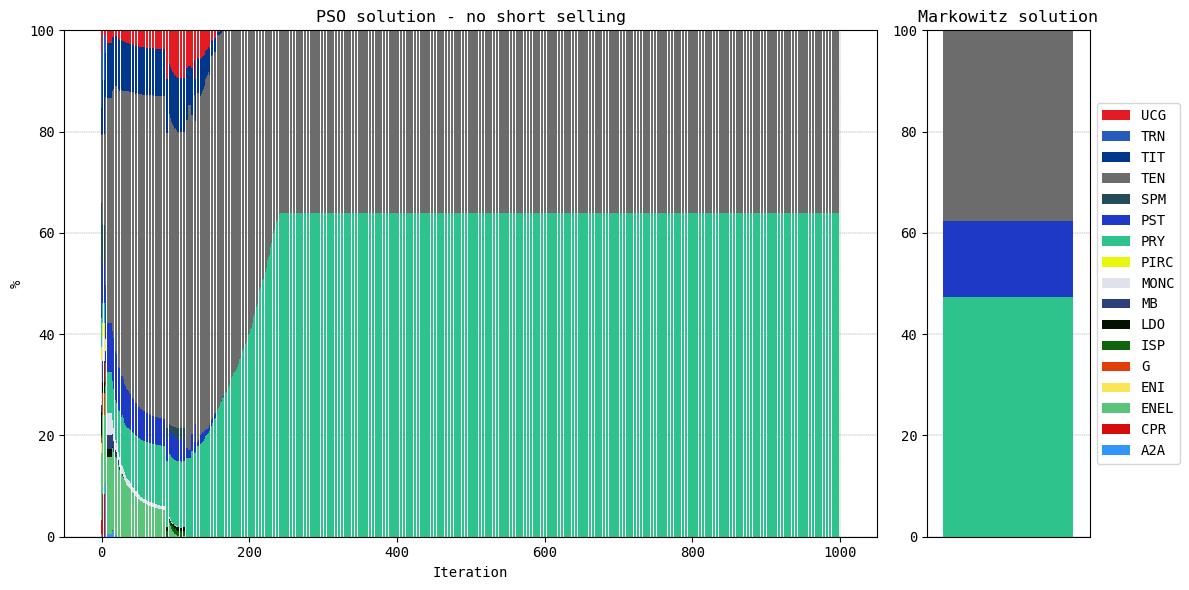

In [30]:
plot_solutions(gbests, 
               optimal_weights_markowitz,
               savefig='out/PSO/Grandma version.png')

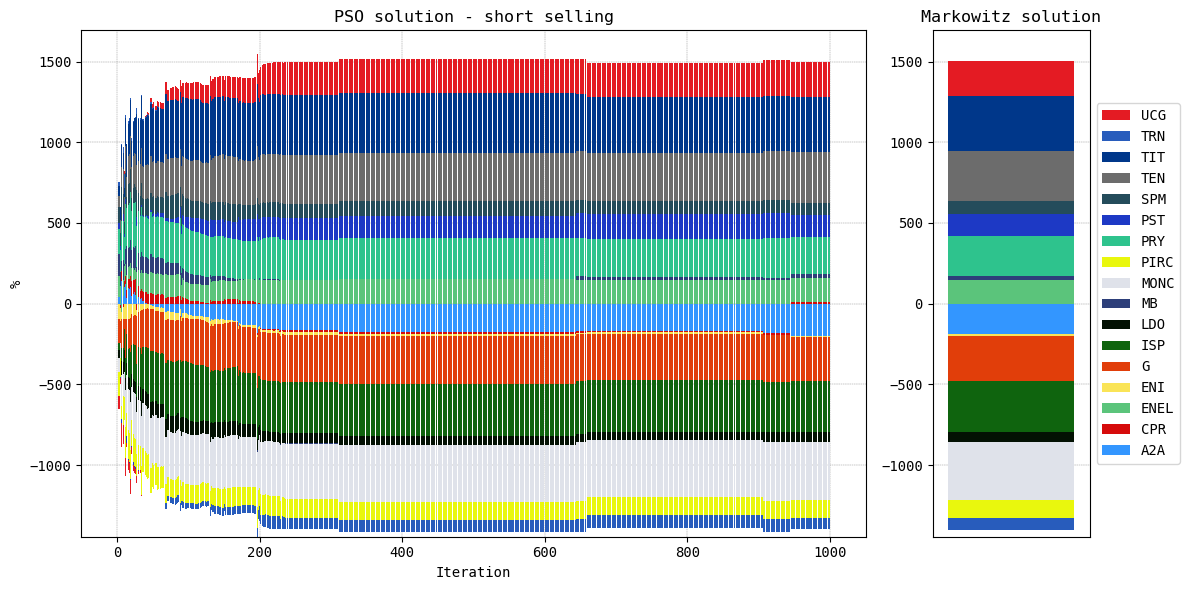

In [31]:
plot_solutions(gbests_short_selling, 
               optimal_weights_markowitz_short_selling,
               savefig='out/PSO/Short selling version.png',
               short_selling=True)

### Particles positions in the final iteration

In [32]:
def plot_particles_positions(final_positions,
                             savefig,
                             short_selling=False):
    fig,ax = plt.subplots(figsize=(12,6))

    data = final_positions*100
    num_bars = data.shape[0]

    if short_selling:
        data_pos = np.where(data<0,0,data)
        data_neg = np.where(data>=0,0,data)
        for i,(ticker,color) in enumerate(companies_colors.items()):
            if i == 0:
                bottom_neg = np.zeros(num_bars)
                bottom_pos = np.zeros(num_bars)
            else:
                bottom_pos = data_pos[:, :i].sum(axis=1)
                bottom_neg = data_neg[:, :i].sum(axis=1)
            ax.bar(range(num_bars), data_pos[:, i], bottom=bottom_pos, label=ticker, color=color)
            ax.bar(range(num_bars), data_neg[:, i], bottom=bottom_neg, label=ticker, color=color)
    else:
        for i,(ticker,color) in enumerate(companies_colors.items()):
            if i == 0:
                bottom = np.zeros(num_bars)
            else:
                bottom = data[:, :i].sum(axis=1)
            ax.bar(range(num_bars), data[:, i], bottom=bottom, label=ticker, color=color)

    ax.set_ylabel('%')
    ax.set_xlabel('Particle ID')
    if short_selling:
        ax.set_title('Final particles positions - short selling')
    else:
        ax.set_title('Final particles position - no short selling')

    if short_selling:
        handles, labels = ax.get_legend_handles_labels()
        handles = handles[::2]
        labels = labels[::2]
        fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), reverse=True)
    else:
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), reverse=True)

    plt.tight_layout()
    fig.savefig(savefig)
    plt.show()

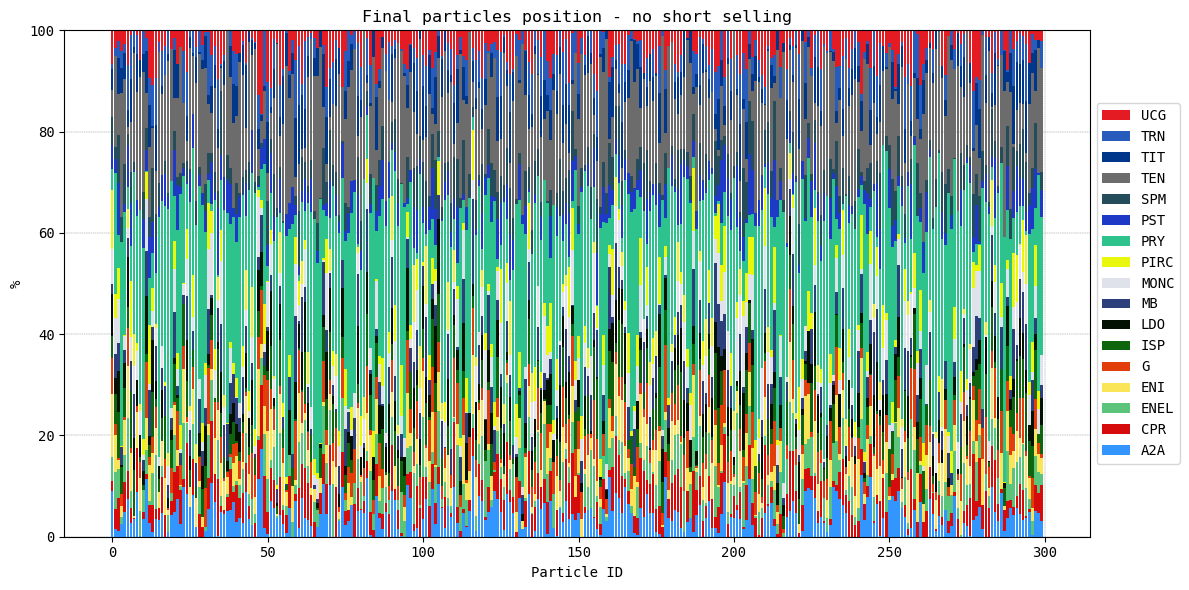

In [33]:
plot_particles_positions(final_positions,
                         savefig='out/PSO/Grandma version - final positions')

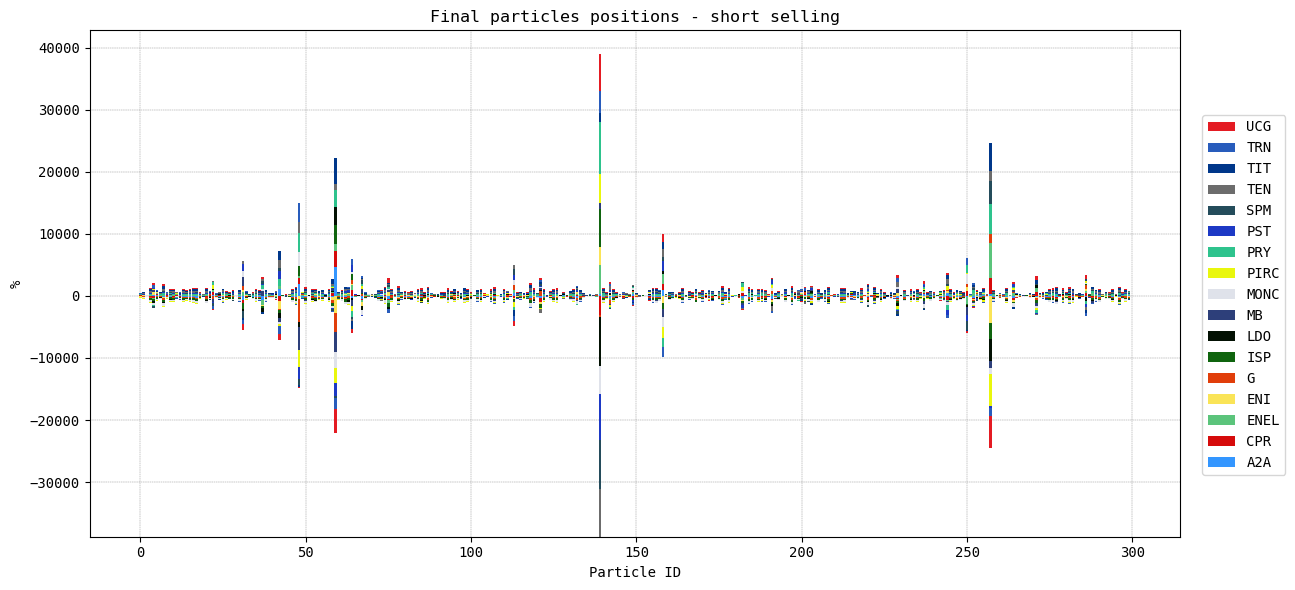

In [34]:
plot_particles_positions(final_positions_short_selling,
                         savefig='out/PSO/Short selling version - final positions',
                         short_selling=True)